# **Second Quantum Computing School Hackathon 2024**

### Hosted by ICTP-SAIFR

---

## **Team: KETAI**

### **Participants:**
- **Jorge David**
- **Juan Ardila**
- **Jose Falla**
- **Arthur**
- **John Velez**

---

### **Project:**

Welcome to our project submission for the 2024 Hackathon at the Second Quantum Computing School hosted by ICTP-SAIFR. We are excited to share our ideas and innovations!

---

**Team KETAI**


In [1]:
!pip install pennylane > /dev/null 2>&1
!pip install matplotlib > /dev/null 2>&1
!pip install scipy > /dev/null 2>&1

In [2]:
import pennylane as qml
from pennylane import numpy as np
# import numpy as np
import multiprocessing
from multiprocessing import Pool
import time
import itertools
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import math
import matplotlib.animation as animation
from IPython.display import Image, display
from numba import njit

# (1) [Exercise] Obtaining expectation value of a Hamiltonian.

Consider the following Hamiltonian

$$
K = \frac{1}{3} \sum_{i < j} X_i X_j - \sum_{i=0}^{n-1} Z_i,
$$

where $n$ is the number of qubits (or wires, in Pennylane language), $X_i$ and $Z_i$ are the Pauli-X and Pauli-Z operators acting on the $i$-th qubit, respectively, and $\sum_{i < j}$ denotes a sum over all pairs $(i, j)$ where $i < j$. For example, for $n = 3$, the pairs that contribute to the sum over $i < j$ are $(0, 1)$, $(1, 2)$, and $(0, 2)$. Note that indexing starts from 0.

You must implement in Pennylane a function that simulates a quantum circuit where the qubits start in the state $|0\rangle$ and a Hadamard gate $H$ is applied to all of them, producing a final state $|\psi\rangle$.

The function must receive the number of qubits and return the expectation value of $K$ for $|\psi\rangle$.


## Solution

Definition of the function that computes the expectation value of $K$ over the state prepared by applying Hadamard gates over all the qubits.

In [3]:

def expectation_value_K(n_qubits: int) -> float:
    """
    Calculates the expectation value of the Hamiltonian
    K = (1/3) sum_{i < j} X_i X_j - sum_{i=0}^{n-1} Z_i,
    where the expectation value is taken with respect to the state
    |ψ⟩. The state |ψ⟩ is prepared by applying Hadamard gates to all qubits.
    """
    # Initialize quantum device
    dev = qml.device('default.qubit', wires=n_qubits)

    # Define the Hamiltonian K
    XX_terms = []
    for i in range(n_qubits):
        for j in range(i + 1, n_qubits):
            XX_terms.append((1/3) * qml.PauliX(wires=i) @ qml.PauliX(wires=j))

    Z_terms = [-qml.PauliZ(wires=i) for i in range(n_qubits)]

    # Total Hamiltonian
    K = sum(XX_terms + Z_terms)

    @qml.qnode(dev)
    def expectation_circuit():
        # Apply Hadamard gates to all qubits
        for wire in range(n_qubits):
            qml.Hadamard(wires=wire)
        return qml.expval(K)

    # Compute and return the expectation value
    return expectation_circuit().numpy()

To study the behavior of the expectation value of the energy in terms of the qubits we plot the expectation values of $K$ in terms of the quantum circuit qubits. The behavior is a quadratic equation with a curious coefficient of 0.17.

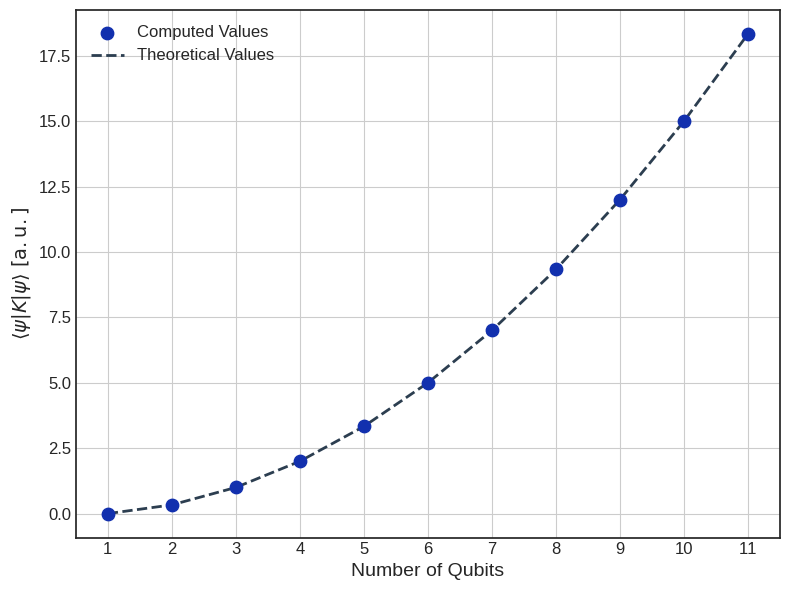

In [4]:
def compute_expectation_value(n_qubits):
    """
    Wrapper function to compute the expectation value and handle exceptions.
    """
    try:
        value = expectation_value_K(n_qubits)
        return value
    except Exception as e:
        print(f"Error for n={n_qubits}: {str(e)}")
        return np.nan

if __name__ == '__main__':
    import warnings
    warnings.filterwarnings("ignore", category=RuntimeWarning)

    # Range of qubits to compute (from 1 to 11)
    n_qubits = 11
    n_qubits_range = range(1, n_qubits + 1)

    # Use all available CPU cores for parallel processing
    num_processes = multiprocessing.cpu_count()

    start_time = time.time()
    with Pool(processes=num_processes) as pool:
        expectation_values = pool.map(compute_expectation_value, n_qubits_range)
    end_time = time.time()

    # Convert to numpy arrays
    x = np.array(n_qubits_range)
    y_computed = np.array(expectation_values)

    # Compute theoretical expectation values
    y_theoretical = x * (x - 1) / 6  # E_theory(n) = n(n-1)/6

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.style.use('seaborn-v0_8-white')

    # Plot computed expectation values
    plt.scatter(x, y_computed, color='#1230AE', s=80, label='Computed Values', zorder=5)

    # Plot theoretical expectation values
    plt.plot(x, y_theoretical, color='#2c3e50', linewidth=2, label='Theoretical Values', zorder=4, linestyle='--')

    # Labels, ticks, and title
    plt.xlabel('Number of Qubits', fontsize=14)
    plt.ylabel(r'$\langle \psi|K|\psi \rangle \ [\mathrm{a.u.}]$', fontsize=14)
    plt.xticks(x, x, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Print the calculated and theoretical expectation values
    # print("\nExpectation Values:")
    # print("Number of Qubits | Computed Value | Theoretical Value")
    # for n, computed, theoretical in zip(x, y_computed, y_theoretical):
        # print(f"{n:^16} | {computed:^14.2f} | {theoretical:^17.2f}")


Figure 1. Comparing theoretical and computed values for the expectation value of the Hamiltonian (K) as the number of qubits are increased. We see nearly perfect computational results when comparing with the theoretical values.:

In [5]:
# Print the calculated and theoretical expectation values
print("\nExpectation Values:")
print("Number of Qubits | Computed Value | Theoretical Value")
for n, computed, theoretical in zip(x, y_computed, y_theoretical):
    print(f"{n:^16} | {computed:^14.2f} | {theoretical:^17.2f}")


Expectation Values:
Number of Qubits | Computed Value | Theoretical Value
       1         |      0.00      |       0.00       
       2         |      0.33      |       0.33       
       3         |      1.00      |       1.00       
       4         |      2.00      |       2.00       
       5         |      3.33      |       3.33       
       6         |      5.00      |       5.00       
       7         |      7.00      |       7.00       
       8         |      9.33      |       9.33       
       9         |     12.00      |       12.00      
       10        |     15.00      |       15.00      
       11        |     18.33      |       18.33      


# (2) [Challenge] Ground state energy for molecule and spin system with Variational Quantum Algorithms and Trotterization.

Variational Quantum Algorithms (VQAs) are a class of hybrid quantum-classical algorithms. These algorithms leverage quantum circuits to accelerate computations while utilizing a classical optimizer to iteratively adjust the parameters of the circuit, seeking to minimize a cost function and ultimately find the correct solution.

- ### (a) The calculation of molecular properties is crucial in scientific and technological fields, such as chemistry and the pharmaceutical industry. In particular, the ground state energy of a molecule provides valuable insights into its properties, including stability and reactivity.

  You must implement a function in Pennylane that simulates the Variational Quantum Eigensolver (VQE). This function should take as input a six-entry array of floating-point numbers, representing the $x$, $y$, and $z$ coordinates of two hydrogen atoms. The first three entries correspond to the coordinates of the first hydrogen atom, and the remaining three entries represent the coordinates of the second hydrogen atom. The function should return the ground state energy of the molecule. Also, explain why the Pauli-Z is necessary in Jordan-Wigner mapping.

  **Observation:** Explicitly define the STO-3G basis function set, multiplicity=1, charge=0, and Jordan-Wigner mapping in the code.

## Solution

In [6]:
def vqe_h2(coordinates : np.ndarray) -> float:
    """
    Calculates the ground state of H2 molecule using the STO-3F basis function set
    in terms of the distance of the hydrogen atoms.

    Args:
        coordiantes (ndarray): [x1, y1, z1, x2, y2, z2] is an array that represents
        the coordiantes of each hydrogen molecule.

    Returns:
        float: the expectation value of the ground state of the H2 molecule in terms
            of the distance between the hydrogen atoms.

    """
    # Extract the coordinates of the two hydrogen atoms
    x1, y1, z1, x2, y2, z2 = coordinates
    symbols = ['H', 'H']
    geometry = np.array([[x1, y1, z1], [x2, y2, z2]])

    # Define molecular parameters
    charge = 0
    multiplicity = 1  # Spin multiplicity (2S+1)
    basis_set = 'sto-3g'
    mapping = 'jordan_wigner'

    # Build the molecular Hamiltonian directly
    H, qubits = qml.qchem.molecular_hamiltonian(
        symbols,
        geometry,
        charge=charge,
        mult=multiplicity,
        basis=basis_set,
        mapping=mapping,
    )

    # Number of electrons and qubits
    n_electrons = 2  # H₂ molecule has 2 electrons
    n_qubits = qubits  # Should be 4 for H₂ in STO-3G basis

    # Build the Hartree-Fock state
    hf_state = qml.qchem.hf_state(n_electrons, n_qubits)

    # Generate the single and double excitations
    singles, doubles = qml.qchem.excitations(n_electrons, n_qubits)

    # Combine singles and doubles
    excitations = singles + doubles

    # Number of parameters
    num_params = len(excitations)

    # Define the ansatz using UCCSD
    def ansatz(params):
        qml.BasisState(hf_state, wires=range(n_qubits))
        for idx, excitation in enumerate(excitations):
            # Check if it's a single excitation (tuple of length 2)
            if len(excitation) == 2:
                i, j = excitation
                qml.SingleExcitation(params[idx], wires=[i, j])
            # Check if it's a double excitation (tuple of length 4)
            elif len(excitation) == 4:
                i, j, k, l = excitation
                qml.DoubleExcitation(params[idx], wires=[i, j, k, l])
            else:
                raise ValueError(f"Unexpected excitation format: {excitation}")

    # Set up the quantum device
    dev = qml.device('default.qubit', wires=n_qubits)

    # Define the cost function for VQE
    @qml.qnode(dev)
    def cost_fn(params):
        ansatz(params)
        return qml.expval(H)

    # Initialize the parameters
    # Starting from zeros may help with convergence
    params = np.zeros(num_params)

    # Optimize the parameters to find the ground state energy
    optimizer = qml.GradientDescentOptimizer(stepsize=0.3)
    max_iterations = 50
    conv_tol = 1e-6

    # Control logic for stop the optimization algorithm is there is no
    # improvement in the loss function value
    try:
        energy = cost_fn(params)
        for n in range(max_iterations):
            params, prev_energy = optimizer.step_and_cost(cost_fn, params)
            energy = cost_fn(params)
            if not math.isfinite(energy):
                print(f"Non-finite energy encountered at iteration {n}: Energy = {energy}")
                return None
            if np.abs(energy - prev_energy) < conv_tol:
                break
    except Exception as e:
        print(f"An error occurred during optimization: {e}")
        return None

    ground_state_energy = energy
    return ground_state_energy

We want to estimate the ground state energy for the bonding distance of hydrogen which is 1.3228 A. For simplicity, we can put one hydrogen atom in the center of the coordinate space and the other hydrogen atom a distance 1.3228 in the z-axis:

In [7]:
energy = vqe_h2(np.array([0.0, 0.0, 0.0, 0.0, 0.0, 1.3228]))
print(f'H2 ground state energy for bonding distace: {energy:.4f} [Hartree]')

H2 ground state energy for bonding distace: -1.1362 [Hartree]


Now, we can plot the ground state energy of the molecule in terms of the distance between the two hydrogen molecules. We obtain the typical curve of a molecular potential:

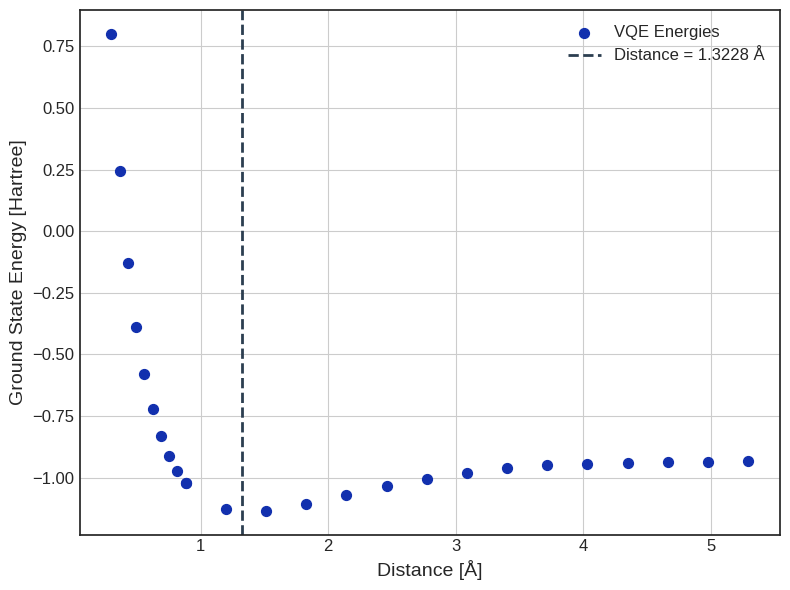

In [8]:
# Suppress warnings for cleaner output
#warnings.filterwarnings("ignore", category=UserWarning)

def vqe_h2(distance):
    """
    Calculates the ground state energy of the H2 molecule using the STO-3G basis set
    for a given distance between the hydrogen atoms.

    Args:
        distance (float): Distance between the two hydrogen atoms along the z-axis.

    Returns:
        float: Ground state energy of the H2 molecule at the given distance.
    """
    # Coordinates of the two hydrogen atoms
    coordinates = np.array([0.0, 0.0, 0.0, 0.0, 0.0, distance])
    symbols = ['H', 'H']
    geometry = coordinates.reshape(-1, 3)

    # Molecular parameters
    charge = 0
    multiplicity = 1  # Spin multiplicity (2S+1)
    basis_set = 'sto-3g'
    mapping = 'jordan_wigner'

    # Build the molecular Hamiltonian
    H, qubits = qml.qchem.molecular_hamiltonian(
        symbols,
        geometry,
        charge=charge,
        mult=multiplicity,
        basis=basis_set,
        mapping=mapping,
    )

    # Number of electrons and qubits
    n_electrons = 2  # H₂ molecule has 2 electrons
    n_qubits = qubits  # Should be 4 for H₂ in STO-3G basis

    # Hartree-Fock state
    hf_state = qml.qchem.hf_state(n_electrons, n_qubits)

    # Generate the single and double excitations
    singles, doubles = qml.qchem.excitations(n_electrons, n_qubits)
    excitations = singles + doubles
    num_params = len(excitations)

    # Ansatz definition using UCCSD
    def ansatz(params):
        qml.BasisState(hf_state, wires=range(n_qubits))
        for idx, excitation in enumerate(excitations):
            if len(excitation) == 2:
                qml.SingleExcitation(params[idx], wires=excitation)
            elif len(excitation) == 4:
                qml.DoubleExcitation(params[idx], wires=excitation)
            else:
                raise ValueError(f"Unexpected excitation format: {excitation}")

    # Quantum device setup
    dev = qml.device('default.qubit', wires=n_qubits)

    # Cost function for VQE
    @qml.qnode(dev)
    def cost_fn(params):
        ansatz(params)
        return qml.expval(H)

    # Initialize parameters
    params = np.zeros(num_params)

    # Optimizer setup
    optimizer = qml.AdamOptimizer(stepsize=0.3)
    max_iterations = 100
    conv_tol = 1e-6

    energy = cost_fn(params)
    for n in range(max_iterations):
        params, prev_energy = optimizer.step_and_cost(cost_fn, params)
        energy = cost_fn(params)
        if not math.isfinite(energy):
            print(f"Non-finite energy encountered at iteration {n}: Energy = {energy}")
            return None
        if np.abs(energy - prev_energy) < conv_tol:
            break

    return energy

def compute_energy(distance):
    """
    Wrapper function to compute energy and handle exceptions.

    Args:
        distance (float): Distance between the two hydrogen atoms.

    Returns:
        tuple: (distance, ground state energy)
    """
    try:
        energy = vqe_h2(distance)
        return (distance, energy)
    except Exception as e:
        print(f"Error for distance={distance}: {str(e)}")
        return (distance, np.nan)

if __name__ == '__main__':
    # Suppress warnings
    #warnings.filterwarnings("ignore")

    # Distances at which to calculate the energy
    distances = np.concatenate([
        np.linspace(0.3, 1.3228/1.5, 10),
        np.linspace(1.3228/1.5, 4*1.3228, 15)
    ])

    # Use all available CPU cores for parallel processing
    num_processes = multiprocessing.cpu_count()

    start_time = time.time()
    with Pool(processes=num_processes) as pool:
        results = pool.map(compute_energy, distances)
    end_time = time.time()

    # Extract distances and energies
    distances = np.array([res[0] for res in results])
    energy_values = np.array([res[1] for res in results])

    # Find energy at distance 1.3228 Å
    distance_specific = 1.3228
    energy_specific = vqe_h2(distance_specific)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.style.use('seaborn-v0_8-white')
    plt.scatter(distances, energy_values, label='VQE Energies', color='#1230AE', s = 50)
    plt.axvline(x=distance_specific, color='#2c3e50', linestyle='--', label=f'Distance = {distance_specific} Å',
                linewidth = 2)
    plt.xlabel('Distance [Å]', fontsize=14)
    plt.ylabel('Ground State Energy [Hartree]', fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.grid()
    plt.show()

Figure 2. Plot of the ground state energy of the H2 molecule as a function of the inter-atomic distance. As expected, for very small inter-atomic distances, the energy goes to infinity, while at long inter-atomic distances we see the dissociation of the H2 molecule into its individual H atoms.

### (b) Consider a spin chain consisting of $N$ spin-$\frac{1}{2}$ particles, where each spin can point either in the positive or negative $x$-direction. Additionally, an external magnetic field is applied to the system.

  This quantum system is described by the Transverse Ising Hamiltonian. For a closed spin chain with a transverse magnetic field of intensity $h$, the Hamiltonian is:

  $$
  H = -\sum_{i} Z_i \otimes Z_{i+1} - h \sum_{i} X_i,
  $$

  where $Z_i$ and $X_i$ are the Pauli-Z and Pauli-X operators acting on the $i$-th spin site, respectively. In a closed chain, the site $N+1$ is identified with the first site.

  You must implement a variational quantum algorithm in Pennylane that, for a given value of the transverse magnetic field $h$, computes the ground state energy of the spin chain with $N = 4$ sites. The magnetic field intensity $h$ should be passed as an input to the algorithm.

## Solution

We can plot the ground state energy of the Transverse Ising Hamiltonian in terms of the applied transverse magnetid field to study its behavior

In [9]:
def transverse_ising_vqe(h:float, layers:int) -> float:
    """
    Computes the ground state of the transverse ising model with periodic
    boundary conditions, applying the VQE algorithm with a hardware efficient
    ansatz of given layers.

    Args:
        h (float): value of the transverse magnetic field.

    Returns:
        float: ground state energy.
    """
    N = 4
    n_qubits = 4

    # Define the coefficients and operators for the Hamiltonian
    coeffs = []
    ops = []

    # First term: -sum_i Z_i Z_{i+1} with periodic boundary conditions
    for i in range(N):
        j = (i + 1) % N  # Periodic boundary conditions
        coeffs.append(-1.0)
        ops.append(qml.PauliZ(i) @ qml.PauliZ(j))

    # Second term: -h * sum_i X_i
    for i in range(N):
        coeffs.append(-h)
        ops.append(qml.PauliX(i))

    # Create the Hamiltonian
    H = qml.Hamiltonian(coeffs, ops)

    # Define the number of layers in the ansatz
    num_layers = layers

    # Total number of parameters: Each layer has 2 parameters per qubit (RY and RZ)
    num_params = num_layers * n_qubits * 2

    # Define the hardware-efficient ansatz
    def ansatz(params):
        params = params.reshape(num_layers, n_qubits, 2)
        for layer in range(num_layers):
            for qubit in range(n_qubits):
                qml.RY(params[layer, qubit, 0], wires=qubit)
                qml.RZ(params[layer, qubit, 1], wires=qubit)
            # Apply entangling gates (e.g., CNOT between neighboring qubits)
            for qubit in range(n_qubits):
                qml.CNOT(wires=[qubit, (qubit + 1) % n_qubits])  # Periodic boundary
        for qubit in range(n_qubits):
            qml.RY(params[layer, qubit, 0], wires=qubit)
            qml.RZ(params[layer, qubit, 1], wires=qubit)

    # Set up the quantum device
    dev = qml.device('default.qubit', wires=n_qubits)

    # Define the cost function
    @qml.qnode(dev)
    def cost_fn(params):
        ansatz(params)
        return qml.expval(H)

    # Initialize the parameters
    np.random.seed(42)
    params = 0.1 * np.random.uniform(0, 2 * np.pi, num_params)

    # Set up the optimizer
    optimizer = qml.AdamOptimizer(stepsize=0.8)
    max_iterations = 50
    conv_tol = 1e-6

    # Optimization loop
    energy = [cost_fn(params)]
    for n in range(max_iterations):
        params = optimizer.step(cost_fn, params)
        e = cost_fn(params)
        energy.append(e)

    ground_state_energy = energy[-1]
    return ground_state_energy

We have a fixed N=4 particles system, but the convergence of the energies depend on the number of layers of the HEA ansatz, therefore, we can plot the ground state energies in terms of the HEA layers to study the behavior

In [10]:
# Define the range of h values
h_values = np.linspace(0.0, 2.0, 16)
layers = [1, 3, 6]

# Use multiprocessing to compute energies for different h

energies_list = []
# Wrapper function to replace the lambda
def run_vqe_with_layer(h_layer_tuple):
    h, layer = h_layer_tuple
    return transverse_ising_vqe(h, layer)

if __name__ == '__main__':
    energies_list = []
    with Pool() as pool:
        for layer in layers:
            # Create a list of tuples (h, layer) for passing to the pool
            params = [(h, layer) for h in h_values]
            energies = pool.map(run_vqe_with_layer, params)
            energies_list.append(energies)


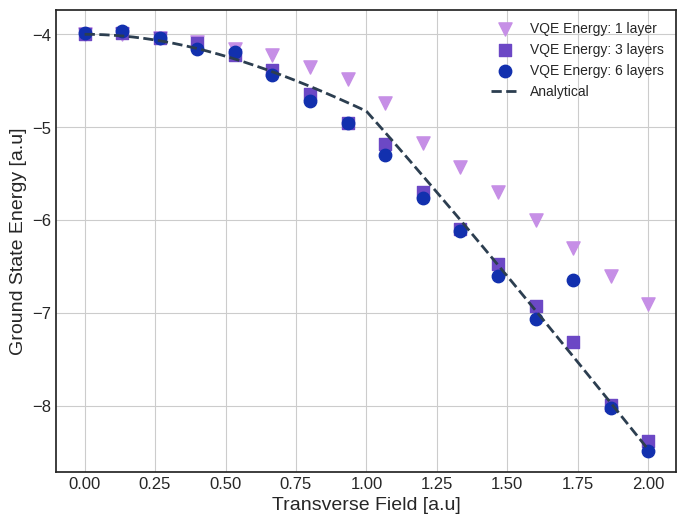

In [11]:
# Exact value of the energy for comparison
h_values_p = np.linspace(0.0, 2.0, 1000)
# List of allowed k values for N=4
k_list = [0, np.pi/2, np.pi, 3*np.pi/2]

E = []
# Loop over h values
for h in h_values_p:
    total_energy = 0
    # Loop over k values and sum the contributions
    for k in k_list:
        e_k = 2 * np.sqrt((h - np.cos(k))**2 + np.sin(k)**2)
        total_energy += -e_k/2
    # Append the total energy for this h
    E.append(total_energy)

# Plot the energies
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-v0_8-white')
plt.scatter(h_values, energies_list[0], label='VQE Energy: 1 layer',
            s = 90, color = '#C68FE6', marker = 'v')
plt.scatter(h_values, energies_list[1], label='VQE Energy: 3 layers',
            s = 80, color = '#6C48C5', marker = 's')
plt.scatter(h_values, energies_list[2], label='VQE Energy: 6 layers',
            s = 80, color = '#1230AE')
plt.plot(h_values_p, E, linestyle ='--', color = '#2c3e50', linewidth = 2, label = 'Analytical')
plt.xlabel('Transverse Field [a.u]', fontsize = 14)
plt.ylabel('Ground State Energy [a.u]', fontsize = 14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(fontsize=12)
plt.legend()
plt.grid()
plt.show()

Figure 3. Ground state energy for the transverse Ising model with periodic boundary conditions, for a N=4 spin system, with respect to the external field h. We see, as expected, that with more layers the computed values get closer to the theoretical value of the energy. Furthermore, we see a clear change in the behavior of the energy for h=1.

(c) The total energy of a quantum system is represented by operator \(H\). We know that an initial quantum state $|\psi\rangle$ evolves over time through the action of the evolution operator \(U\), defined as

$$
U(t) = \exp[-iHt]
$$

However, it's possible to build quantum circuits that approximate the realization of \(U(t)\), one of these methods being known as Trotterization. If we can write \(H\) as

$$
H = \sum_{i=1}^{k} H_i
$$

of a number \(k\) of Hermitian operators \(H_i\) that do not necessarily commute, we can approximate \(U(t)\) via

$$
U(t) \approx \prod_{j=1}^{n} \prod_{i=1}^{k} \exp \left( -\frac{iH_it}{n} \right)
$$

with each term in the j-product called a Trotter step. The larger \(n\) is, i.e., the more Trotter steps, the better the approximation of \(U\) that we get.

You must implement in Pennylane a function which applies the evolution operator related to the Hamiltonian

$$
H = \alpha X \otimes X + \beta Z \otimes Z
$$

in the state $|00\rangle$. The function must receive as parameters $\alpha$, $\beta$, the time $t$, and the number of Trotter steps $n$ in this order. It must return the probability of measure $|00\rangle$, $|01\rangle$, $|10\rangle$, $|11\rangle$.

**Observation**: You may not use PennyLane’s built-in time evolution (`qml.ApproxTimeEvolution`, `qml.evolve`) nor `qml.QubitUnitary`. All the measures must be done in the computational base.


In [12]:
def trotterization_circuit(alpha, beta, t, n) -> list:
    """
    Calculates the dynamical evolution of the given Hamiltonian applying
    trotterization of the Hamiltonian.

    Args:
        alpha (float): X gates coefficient of the Hamiltonian.
        beta (float): Z gates coefficient of the Hamiltonian.
        t (float): final time of the dynamical simulation.
        n (float): steps of trotterization.

    Returns:
        list: list of the probabilities of the states in time steps.
    """

    dev = qml.device('default.qubit', wires=2)

    @qml.qnode(dev)
    def circuit():
        # Apply Trotter steps
        for _ in range(n):
            # Implement exp(-i alpha X⊗X t / n)
            qml.IsingXX(2 * alpha * t / n, wires=[0, 1])
            # Implement exp(-i beta Z⊗Z t / n)
            qml.IsingZZ(2 * beta * t / n, wires=[0, 1])
        return qml.probs(wires=[0, 1])

    probs = circuit()
    return probs.tolist()


N.B. We have included two implementations of the Trotteriztion circuit. The difference between these implementations is the use of Pennylane's qml.IsingXX and qml.IsingZZ in the first implementation, and direct application of X- and Z-gates in the second implementation.

In [13]:
def trotterization_circuit_2(alpha, beta, t, n_trotter):
    """
    Calculates the dynamical evolution of the given Hamiltonian applying
    trotterization of the Hamiltonian.

    Args:
        alpha (float): X gates coefficient of the Hamiltonian.
        beta (float): Z gates coefficient of the Hamiltonian.
        t (float): final time of the dynamical simulation.
        n_trotter (float): steps of trotterization.

    Returns:
        list: list of the probabilities of the states in time steps.
    """

    n_wires = 2
    delta = t / n_trotter
    params = [alpha, beta]
    t = [i * delta for i in range(n_trotter)]

    dev = qml.device('default.qubit', wires=n_wires)

    @qml.qnode(dev)
    def circuit(params, n_trotter):
        # Apply Trotter steps
        for _ in range(n_trotter):
            # Implement exp(-i alpha X⊗X t / n)
            qml.CNOT(wires=[0, 1])
            qml.RX(-2 * params[0] * delta, wires=0)
            qml.CNOT(wires=[0, 1])
            # Implement exp(-i beta Z⊗Z t / n)
            qml.CNOT(wires=[0, 1])
            qml.RZ(-2 * params[1] * delta, wires=1)
            qml.CNOT(wires=[0, 1])

        return qml.probs(wires=[0, 1])

    probabilities = circuit(params, n_trotter)
    return probabilities.tolist()

For simplicity, we can study the case when $\alpha=1$ and $\beta=1$

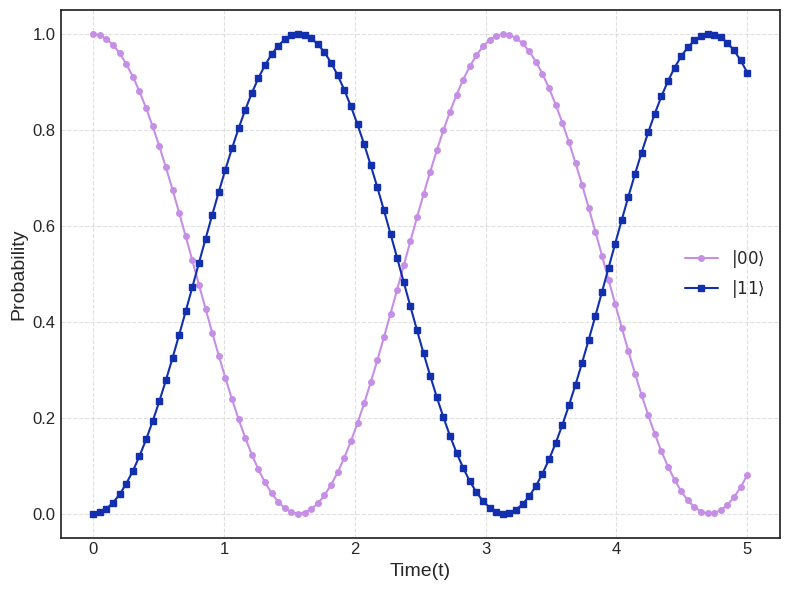

In [21]:
# Parameters
alpha = 1
beta = 1
n = 1000
t_values = np.linspace(0, 5, 100)

# Probabilities calculation
def calculate_probs(t):
    # probs = trotterization(alpha, beta, t, n)
    probs = trotterization_circuit(alpha, beta, t, n) # You can change to trotterization_circuit_2 to use second implementation
    return probs[0], probs[3]  # Only probabilities of |00> and |11>

# Multiprocessing for parallel computation
if __name__ == '__main__':
    with Pool() as pool:
        results = pool.map(calculate_probs, t_values)
    # Results for each probability, in this case we dont have |01> and |10>
    probs_0, probs_1 = zip(*results)

plt.figure(figsize=(8, 6))
plt.style.use('seaborn-v0_8-white')
plt.plot(t_values, probs_0, label=r'$|00\rangle$', linestyle='-', color='#C68FE6', marker='o', markersize=4)
plt.plot(t_values, probs_1, label=r'$|11\rangle$', linestyle='-', color='#1230AE', marker='s', markersize=4)

# Plot
plt.xlabel("Time(t)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center right", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Figure 4. Time-evolution of the probability of states |00>, |01>, |10>, and |11> for parameters $\alpha=1$ and $\beta=1$. We see that there is an oscillation between states |00> and |11>, while the probability for states |01> and |10> remain null throughout.

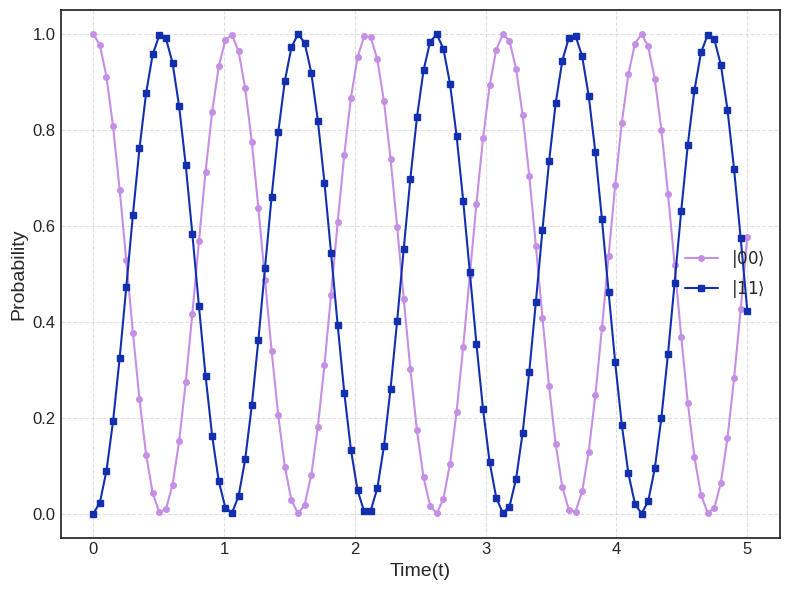

In [15]:
# Parameters
alpha = 3
beta = 1
n = 1000
t_values = np.linspace(0, 5, 100)

# Probabilities calculation
def calculate_probs(t):
    # probs = trotterization(alpha, beta, t, n)
    probs = trotterization_circuit(alpha, beta, t, n)
    return probs[0], probs[3]  # Only probabilities of |00> and |11>

# Multiprocessing for parallel computation
if __name__ == '__main__':
    with Pool() as pool:
        results = pool.map(calculate_probs, t_values)
    # Results for each probability, in this case we dont have |01> and |10>
    probs_0, probs_1 = zip(*results)

plt.figure(figsize=(8, 6))
plt.style.use('seaborn-v0_8-white')
plt.plot(t_values, probs_0, label=r'$|00\rangle$', linestyle='-', color='#C68FE6', marker='o', markersize=4)
plt.plot(t_values, probs_1, label=r'$|11\rangle$', linestyle='-', color='#1230AE', marker='s', markersize=4)

# Plot
plt.xlabel("Time(t)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center right", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Figure 5. Figure 4. Time-evolution of the probability of states |00>, |01>, |10>, and |11> for parameters $\alpha=3$ and $\beta=1$. We see that there is an oscillation between states |00> and |11>, while the probability for states |01> and |10> remain null throughout. We see that the $\alpha$ parameter controls the frequency of the oscillations, being this an analog situation to the Rabi problem.

# (3) [Challenge] Computational Project

To treat the dynamics of BECs, we need the time-dependent GPE,

$$
i\hbar \frac{\partial \psi(r, t)}{\partial t} = -\frac{\hbar^2}{2m} \nabla^2 \psi(r, t) + V(r) \psi(r, t) + U_0 |\psi(r, t)|^2 \psi(r, t).
$$

Studying the dynamics of interacting systems is challenging. Fortunately, we can employ numerical methods to investigate these systems.

First, let us consider the one-dimensional non-interacting case. The dimensionless equation we wish to solve is:

$$
H \psi(x, t) = i \frac{\partial \psi(x, t)}{\partial t},
$$

with

$$
H = \frac{1}{2} \frac{\partial^2}{\partial x^2} + V(x).
$$

When solving problems analytically, we obtain $ \psi(x, t) $ in the continuum of position and time. Here, we will adopt a different approach, which is better suited to handle this problem numerically. We begin by discretizing our spatial and temporal domains, i.e., we consider $ \psi(x_i, t_j) $ with equally-spaced points in space and time, $ x_i = i \Delta x $ and $ t_j = j \Delta t $ (integer $ i $ and $ j $).

Visccher proposed this algorithm for the temporal evolution we will employ in this project (see the suggested bibliography). We write explicitly the real and imaginary parts of the wave function: $ \psi(x, t) = R(x, t) + i I(x, t) $. Substituting it into the time-dependent Schrödinger equation, we obtain two equations:

$$
\frac{dR}{dt} = HI,
$$

$$
\frac{dI}{dt} = -HR.
$$

Instead of computing both the real and imaginary parts at the same time $ t $, we calculate $ R $ at $ t = 0, \Delta t, 2\Delta t, \dots $ and $ I $ at $ t = \Delta t/2, 3\Delta t/2, 5\Delta t/2, \dots $. Their time-evolution is given by:

$$
R \left( x, t + \frac{\Delta t}{2} \right) = R \left( x, t - \frac{\Delta t}{2} \right) + \Delta t \, H I \left( x, t \right),
$$

$$
I \left( x, t + \frac{\Delta t}{2} \right) = I \left( x, t - \frac{\Delta t}{2} \right) - \Delta t \, H R(x, t).
$$

To start the algorithm, we need $ R(x, 0) $ (which comes from the initial conditions) and $ I(x, \Delta t/2) $, which can be obtained by performing a "half step":

$$
I \left( x, \frac{\Delta t}{2} \right) = I(x, 0) - H R(x, 0) \frac{\Delta t}{2}.
$$

Equations (11) to (13) contain the kinetic operator applied to the real and imaginary parts of the wave function. The second spatial derivative of a discretized function can be calculated using:

$$
\frac{\partial^2 f(x_i, t)}{\partial x^2} \approx \frac{f(x_{i+1}, t) - 2f(x_i, t) + f(x_{i-1}, t)}{(\Delta x)^2}.
$$

The probability density is not obvious in this case since we are computing the real and imaginary components of the wave function at different time instants. We have two alternatives:

$$
P(x, t) = R(x, t)^2 + I(x, t + \Delta t/2)I(x, t - \Delta t/2),
$$

$$
P(x, t) = R(x, t + \Delta t/2)R(x, t - \Delta t/2) + I(x, t)^2.
$$

Finally, we have to check if the values we choose for $ \Delta x $ and $ \Delta t $ provide a stable evolution. The stability criterion is given by:

$$
- \frac{2}{\Delta t} < V < \frac{2}{\Delta t} - \frac{2}{(\Delta x)^2},
$$

which means that, for a given $ V $ and $ \Delta x $, we can always decrease $ \Delta t $ to fulfill the stability condition.

Write a program that uses the algorithm above to compute the time-evolution of an initial state subjected to a harmonic trap,

$$
V(x) = \frac{1}{2} x^2.
$$

Consider a spatial domain from $ -L $ to $ L $. Choose a value $ L $ that is sufficiently large so we can assume $ \psi(-L, t_j) = \psi(L, t_j) = 0 $ during the whole evolution. Plot $ P(x, t) $ for different values of $ t $. Alternatively, you can make a GIF with the time evolution.

In [16]:
import numpy as np
# Spatial domain parameters
L = 10.0               # Spatial domain extends from -L to L
N = 1000               # Number of spatial points
dx = 2 * L / (N - 1)   # Spatial step size
x = np.linspace(-L, L, N)  # Spatial grid

# Harmonic oscillator parameters
omega = 1.0                            # Angular frequency of the oscillator
V = 0.5 * omega**2 * x**2               # Potential energy array for harmonic oscillator

# Stability criterion for time step
dt = dx**2 / 4                          # Time step size (must be smaller than dx^2 / 2 for stability)

# Time evolution parameters
t_max = 5.0                             # Maximum simulation time
n_steps = int(t_max / dt)               # Total number of time steps

def psi_initial_a(x):
    """
    Initial wave function for Part (a): Ground state of the harmonic oscillator.

    Parameters:
        x (numpy.ndarray): Spatial grid points.

    Returns:
        numpy.ndarray: Initial wave function evaluated at each x.
    """
    return (1 / np.pi)**0.25 * np.exp(-x**2 / 2)

def psi_initial_b(x):
    """
    Initial wave function for Part (b): Excited state or another Gaussian.

    Parameters:
        x (numpy.ndarray): Spatial grid points.

    Returns:
        numpy.ndarray: Initial wave function evaluated at each x.
    """
    return (2 / np.pi)**0.25 * np.exp(-x**2)  # Corrected exponentiation

@njit
def H(f, V, dx):
    """
    Hamiltonian operator acting on a wave function component.

    Parameters:
        f (numpy.ndarray): Wave function component (real or imaginary part).
        V (numpy.ndarray): Potential energy array.
        dx (float): Spatial step size.

    Returns:
        numpy.ndarray: Result of applying the Hamiltonian to f.
    """
    N = f.size
    d2f_dx2 = np.zeros_like(f)

    # Compute second derivatives using central differences for interior points
    for i in range(1, N - 1):
        d2f_dx2[i] = (f[i+1] - 2 * f[i] + f[i-1]) / dx**2

    # Apply Dirichlet Boundary Conditions (f = 0 at boundaries)
    d2f_dx2[0] = (f[1] - 2 * f[0]) / dx**2        # Left boundary (f[-1] = 0)
    d2f_dx2[-1] = (-2 * f[-1] + f[-2]) / dx**2    # Right boundary (f[N] = 0)

    # Apply Hamiltonian: -0.5 * d2f_dx2 + V * f
    Hf = -0.5 * d2f_dx2 + V * f
    return Hf

def time_evolution(R_initial, I_initial, H, V, dx, dt, n_steps):
    """
    Evolves the wave function in time using the Visscher algorithm.

    Parameters:
        R_initial (numpy.ndarray): Initial real part of the wave function.
        I_initial (numpy.ndarray): Initial imaginary part of the wave function.
        H (function): Hamiltonian operator function.
        V (numpy.ndarray): Potential energy array.
        dx (float): Spatial step size.
        dt (float): Time step size.
        n_steps (int): Number of time steps to evolve.

    Returns:
        list: Times at which probability densities are recorded.
        list: List of probability density arrays at recorded times.
        list: List of normalization values at recorded times.
    """
    # Initialize variables
    R = R_initial.copy()
    I = I_initial.copy()
    I_half = I - 0.5 * dt * H(R, V, dx)  # Initial half-step for imaginary part
    t = 0.0

    # Lists to store results
    times = [t]
    P = R**2 + I_half**2  # Initial probability density
    P_list = [P]
    norm = np.trapz(P, dx=dx)
    norm_list = [norm]

    # Time evolution loop
    for n in range(n_steps):
        # Store current R and I_half before updating
        R_prev = R.copy()
        I_half_prev = I_half.copy()

        # Update R at t + dt
        R = R + dt * H(I_half, V, dx)

        # Update I_half at t + dt/2
        I_half = I_half - dt * H(R, V, dx)

        t += dt

        # Store probability density every 100 steps
        if n % 100 == 0:
            times.append(t)
            # Compute P using the first alternative:
            # P(x, t) = R(x, t)^2 + I(x, t + dt/2) * I(x, t - dt/2)
            P = R**2 + I_half * I_half_prev
            P_list.append(P)
            # Compute normalization
            norm = np.trapz(P, dx=dx)
            norm_list.append(norm)

    return times, P_list, norm_list

def create_animation(x, times, P_list, norm_list, L, gif_filename="probability_density_evolution.gif"):
    """
    Creates and saves an animation (GIF) of the probability density evolution.

    Parameters:
        x (numpy.ndarray): Spatial grid points.
        times (list): List of times corresponding to each probability density snapshot.
        P_list (list): List of probability density arrays.
        norm_list (list): List of normalization values at recorded times.
        L (float): Spatial domain limit (for setting plot limits).
        gif_filename (str): Filename for the saved GIF.

    Returns:
        matplotlib.animation.FuncAnimation: The animation object.
    """
    # Set up the plot
    plt.style.use('seaborn-v0_8-white')
    fig, ax = plt.subplots()
    line, = ax.plot(x, P_list[0], color='#1230AE')
    ax.set_xlim(-3, 3)
    ax.set_ylim(0, np.max(P_list[0]) * 1.2)
    ax.set_xlabel('x')
    ax.set_ylabel('Probability Density P(x,t)')
    ax.grid(True)
    title_text = ax.set_title(f'Time = {times[0]:.2f}, Norm = {norm_list[0]:.2f}')
    plt.tight_layout()

    # Update function for animation
    def animate(i):
        line.set_ydata(P_list[i])
        title_text.set_text(f'Time = {times[i]:.2f}, Norm = {norm_list[i]:.2f}')
        return line, title_text

    # Create the animation
    ani = animation.FuncAnimation(fig, animate, frames=len(P_list), interval=100, blit=True)

    # Save the animation as a GIF
    ani.save(gif_filename, writer="pillow", fps=10)

    plt.close(fig)  # Close the figure to prevent it from displaying here

    return ani

def simulate_wave_evolution(psi_initial_func='a'):
    """
    Simulates the time evolution of a quantum wave function in a harmonic oscillator potential
    and displays the resulting probability density animation as a GIF.

    Parameters:
        psi_initial_func (str or function): Choice of initial wave function.
            - If 'a', uses psi_initial_a.
            - If 'b', uses psi_initial_b.
            - If callable, uses the provided function.

    Returns:
        None: Displays the GIF inline.
    """
    # Select the initial wave function based on user input
    if psi_initial_func == 'a':
        psi_initial = psi_initial_a(x)
    elif psi_initial_func == 'b':
        psi_initial = psi_initial_b(x)
    elif callable(psi_initial_func):
        psi_initial = psi_initial_func(x)
    else:
        raise ValueError("Invalid psi_initial_func. Choose 'a', 'b', or provide a callable function.")

    # Decompose into real and imaginary parts
    R_initial = np.real(psi_initial)
    I_initial = np.zeros_like(R_initial)  # Initial I(x,0) = 0

    # Perform time evolution
    times, P_list, norm_list = time_evolution(R_initial, I_initial, H, V, dx, dt, n_steps)

    # Create the animation and save as GIF
    gif_filename = "probability_density_evolution.gif"
    create_animation(x, times, P_list, norm_list, L, gif_filename)

    # Display the GIF
    display(Image(filename=gif_filename))

### (a) Initial State
$$ \psi(x, 0) = \left(\frac{1}{\pi}\right)^{1/4} e^{-x^2/2}$$

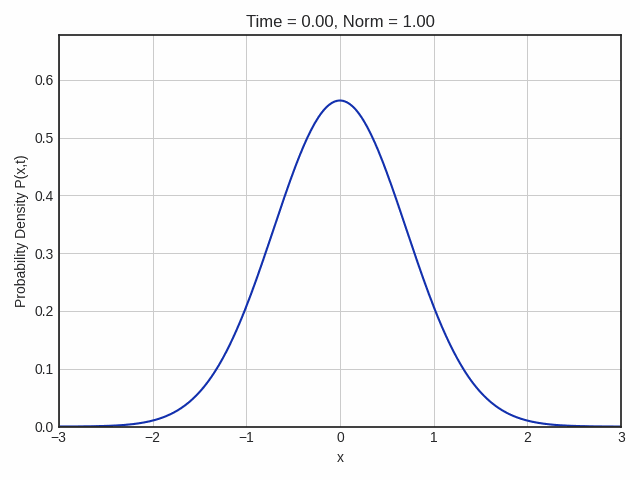

In [17]:
simulate_wave_evolution('a')

Figure 6. Time evolution of the probability density versus spatial coordinates. We see that the probability density remains constant over time.

**Observation:**

- The probability density $ P(x, t) $ remains constant over time.
- The wave function maintains its shape without spreading or oscillating.

**Explanation:**

This initial state is the ground state of the harmonic oscillator, an eigenstate of the Hamiltonian $ H $. The time evolution of an eigenstate is given by:

$$
\psi(x, t) = \psi(x, 0)e^{-iE_0t},
$$

where $ E_0 $ is the ground state energy. The global phase factor
$e^{-iE_0t}$ does not affect the probability density $ P(x, t) = |\psi(x, t)|^2 $, resulting in a stationary probability distribution.

### (b) Initial State
$$ \psi(x, 0) = \left(\frac{2}{\pi}\right)^{1/4} e^{-x^2} $$

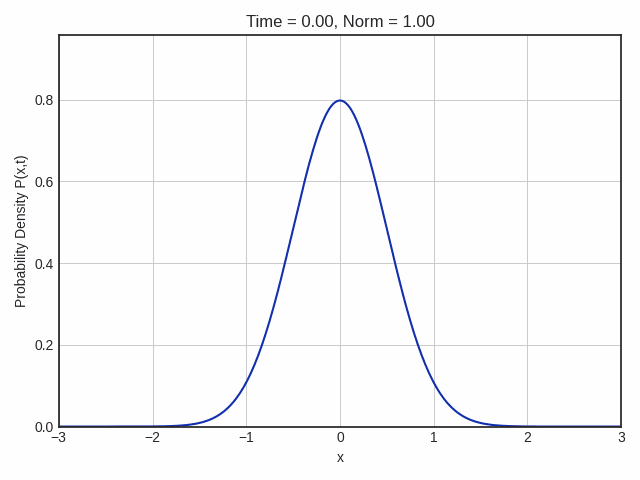

In [18]:
simulate_wave_evolution('b')

Figure 7. Time evolution of the probability density versus spatial coordinates. We see that the probability density exhibits periodic oscillations.

**Observation:**

- The probability density $ P(x, t) $ exhibits periodic oscillations.
- The wave function alternately spreads out and contracts over time.

**Explanation:**

This initial state is not an eigenstate of the harmonic oscillator Hamiltonian. It can be expressed as a superposition of the ground state and excited states:

$$
\psi(x, 0) = c_0 \psi_0(x) + c_1 \psi_1(x) + c_2 \psi_2(x) + \dots
$$

Each eigenstate evolves with its own phase factor $ e^{-iE_n t} $, leading to interference effects. The superposition results in a time-dependent probability density that oscillates due to the different energy eigenvalues $ E_n $.



### (c)

Now that we have some familiarity with the non-interacting case, we can consider the one-dimensional GPE. We have to modify our algorithm to take into account the non-linear term. This can be done by using Eqs. (14) and (15) for including the non-linear term $ U_0 |\psi(x, t)|^2 $ into Eqs. (11) and (12),

$$
R \left( t + \frac{\Delta t}{2} \right) = R \left( t - \frac{\Delta t}{2} \right) + \Delta t \left[ -\frac{1}{2} \frac{\partial^2}{\partial x^2} + V + U_0 \left( R \left( t + \frac{\Delta t}{2} \right) R \left( t - \frac{\Delta t}{2} \right) + I(t)^2 \right) \right] I(t),
$$

$$
I \left( t + \frac{\Delta t}{2} \right) = I \left( t - \frac{\Delta t}{2} \right) - \Delta t \left[ -\frac{1}{2} \frac{\partial^2}{\partial x^2} + V + U_0 \left( R(t)^2 + I \left( t + \frac{\Delta t}{2} \right) I \left( t - \frac{\Delta t}{2} \right) \right) \right] R(t),
$$

where we omitted the spatial dependence for brevity. Solving for $ R \left( t + \frac{\Delta t}{2} \right) $ and $ I \left( t + \frac{\Delta t}{2} \right) $, we have the algorithm for the updates:

$$
R \left( t + \frac{\Delta t}{2} \right) = \frac{R \left( t - \frac{\Delta t}{2} \right) + \Delta t \left[ -\frac{1}{2} \frac{\partial^2}{\partial x^2} + V + U_0 I(t)^2 \right] I(t)}{1 - \Delta t U_0 R(t - \Delta t / 2) I(t)},
$$

$$
I \left( t + \frac{\Delta t}{2} \right) = \frac{I \left( t - \frac{\Delta t}{2} \right) - \Delta t \left[ -\frac{1}{2} \frac{\partial^2}{\partial x^2} + V + U_0 R(t)^2 \right] R(t)}{1 + \Delta t U_0 I(t - \Delta t / 2) R(t)}.
$$

For the "half step," the generalization of Eq. (13),

$$
I \left( x, \frac{\Delta t}{2} \right) = I(x, 0) - \frac{\Delta t}{2} \left[ -\frac{1}{2} \frac{\partial^2}{\partial x^2} + V + U_0 \left( R(x, 0)^2 + I(x, 0)^2 \right) \right] R(x, 0).
$$

Modify your program to consider a non-zero value of $ U_0 $, that is, the updates given by Eqs. (16) to (18). Consider the case of $ V = 0 $, $ U_0 = -2 $, and the initial state:

$$
\psi(x, 0) = \frac{1}{\sqrt{2} \cosh(x)}.
$$

What happens? Why?

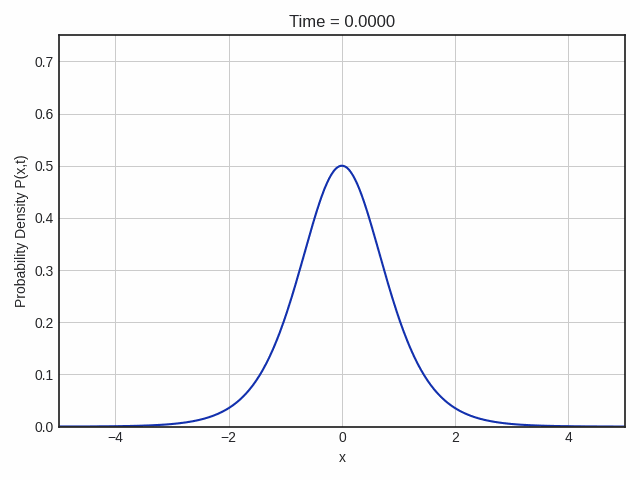

In [19]:
# Spatial domain parameters
L = 10.0                     # Spatial domain extends from -L to L
N = 1000                     # Number of spatial points
dx = 2 * L / (N - 1)         # Spatial step size
x = np.linspace(-L, L, N)    # Spatial grid

# Time evolution parameters
dt = 0.0001                  # Time step size
t_max = 4.0                  # Maximum simulation time
nt = int(t_max / dt)         # Total number of time steps

# Nonlinear and potential parameters
U0 = -2.0                    # Nonlinear coefficient (attractive if negative)
V = np.zeros(N)              # Potential V(x) = 0 (free space)

def psi_initial(x):
    """
    Initial wave function: Soliton solution (sech function).

    Parameters:
        x (numpy.ndarray): Spatial grid points.

    Returns:
        numpy.ndarray: Initial wave function evaluated at each x.
    """
    return 1 / (np.sqrt(2) * np.cosh(x))

@njit
def second_derivative(f, dx):
    """
    Computes the second spatial derivative of a function using central differences.

    Parameters:
        f (numpy.ndarray): Function values at each spatial grid point.
        dx (float): Spatial step size.

    Returns:
        numpy.ndarray: Second derivative of f with respect to x.
    """
    N = len(f)
    d2f_dx2 = np.zeros_like(f)
    # Central differences for interior points
    for i in range(1, N - 1):
        d2f_dx2[i] = (f[i+1] - 2*f[i] + f[i-1]) / dx**2
    # Boundary points (Dirichlet Boundary Conditions: f = 0)
    d2f_dx2[0] = (f[1] - 2*f[0]) / dx**2        # Left boundary
    d2f_dx2[-1] = (-2*f[-1] + f[-2]) / dx**2    # Right boundary
    return d2f_dx2

def create_animation(x, times, P_list, L, gif_filename="probability_density_evolution_nlse.gif"):
    """
    Creates and saves an animation (GIF) of the probability density evolution.

    Parameters:
        x (numpy.ndarray): Spatial grid points.
        times (list): List of times corresponding to each probability density snapshot.
        P_list (list): List of probability density arrays.
        L (float): Spatial domain limit (for setting plot limits).
        gif_filename (str): Filename for the saved GIF.

    Returns:
        None: Saves and displays the GIF.
    """
    # Set up the plot
    fig, ax = plt.subplots()
    line, = ax.plot(x, P_list[0], color='#1230AE')
    ax.set_xlim(-L/2, L/2)
    ax.set_ylim(0, np.max(P_list[0]) * 1.5)
    ax.set_xlabel('x')
    ax.set_ylabel('Probability Density P(x,t)')
    title_text = ax.set_title(f'Time = {times[0]:.4f}')
    ax.grid(True)
    plt.tight_layout()

    # Update function for animation
    def animate(i):
        line.set_ydata(P_list[i])
        title_text.set_text(f'Time = {times[i]:.4f}')
        return line, title_text

    # Create the animation
    ani = animation.FuncAnimation(fig, animate, frames=len(P_list), interval=100, blit=True)

    # Save the animation as a GIF
    ani.save(gif_filename, writer="pillow", fps=10)

    plt.close(fig)  # Close the figure to prevent it from displaying here

    # Display the GIF
    display(Image(filename=gif_filename))

def time_evolution(R, I, second_derivative, dx, dt, nt, U0, V, x):
    """
    Evolves the wave function in time using the modified Visscher algorithm for the GPE.

    Parameters:
        R (numpy.ndarray): Real part of the wave function at time t_n.
        I (numpy.ndarray): Imaginary part of the wave function at time t_n + dt/2.
        second_derivative (function): Function to compute the second derivative.
        dx (float): Spatial step size.
        dt (float): Time step size.
        nt (int): Total number of time steps.
        U0 (float): Nonlinear coefficient.
        V (numpy.ndarray): Potential energy array.
        x (numpy.ndarray): Spatial grid points.

    Returns:
        tuple:
            times (list): Times at which probability densities are recorded.
            P_list (list): List of probability density arrays at recorded times.
            norms (list): List of normalization values at recorded times.
    """
    times = [0.0]
    P = R**2 + I**2
    norms = [np.trapz(P, x)]
    P_list = [P.copy()]

    for n in range(nt):
        # Compute second derivative of I
        d2I_dx2 = second_derivative(I, dx)
        # Compute numerator and denominator for R update
        H_I = -0.5 * d2I_dx2 + V * I + U0 * (R * I**2 + I**3)
        numerator_R = R + dt * H_I
        denominator_R = 1 - dt * U0 * R * I
        R_new = numerator_R / denominator_R

        # Apply Dirichlet Boundary Conditions
        R_new[0] = R_new[-1] = 0.0

        # Compute second derivative of R_new
        d2R_dx2 = second_derivative(R_new, dx)
        # Compute numerator and denominator for I update
        H_R = -0.5 * d2R_dx2 + V * R_new + U0 * (R_new**3 + R_new * I**2)
        numerator_I = I - dt * H_R
        denominator_I = 1 + dt * U0 * R_new * I
        I_new = numerator_I / denominator_I

        # Apply Dirichlet Boundary Conditions
        I_new[0] = I_new[-1] = 0.0

        # Update variables for next time step
        R = R_new.copy()
        I = I_new.copy()

        # Store results every 1000 steps
        if n % 1000 == 0:
            t = (n + 1) * dt
            times.append(t)
            P = R**2 + I**2
            P_list.append(P.copy())
            norm = np.trapz(P, x)
            norms.append(norm)
            #print(f"Time {t:.4f}, Norm {norm:.6f}")

    return times, P_list, norms

def simulate_nlse_evolution(psi_initial_func=None):
    """
    Simulates the time evolution of a quantum wave function under the NLSE and displays the resulting probability density animation as a GIF.

    Parameters:
        psi_initial_func (function, optional): Function defining the initial wave function.
            - If None, uses the default `psi_initial`.
            - Otherwise, should accept a numpy.ndarray and return a numpy.ndarray.

    Returns:
        tuple:
            times (list): Times at which probability densities are recorded.
            P_list (list): List of probability density arrays at recorded times.
            norms (list): List of normalization values at recorded times.
    """
    # Select the initial wave function
    if psi_initial_func is not None:
        psi0 = psi_initial_func(x)
    else:
        psi0 = psi_initial(x)

    # Decompose into real and imaginary parts
    R = np.real(psi0)
    I = np.zeros_like(R)  # I(x, 0) = 0

    # Compute initial half-step for I using equation (18)
    d2R_dx2 = second_derivative(R, dx)
    H_R0 = -0.5 * d2R_dx2 + V * R + U0 * R**3
    I = I - (dt / 2) * H_R0

    # Perform time evolution
    times, P_list, norms = time_evolution(R, I, second_derivative, dx, dt, nt, U0, V, x)

    # Create and save the animation
    gif_filename = "probability_density_evolution_nlse.gif"
    create_animation(x, times, P_list, L, gif_filename)

    return times, P_list, norms

# Run the simulation
times, P_list, norms = simulate_nlse_evolution()

Figure 8. Time evolution of the probability density versus spatial coordinates. We see that the probability density changes rapidly with respect to time.

### When $$V=0$$
Without an external potential, we might initially expect that the norm could be more likely to be conserved, but that’s not actually the case here. The nonlinear term
$U_0 |\psi|^2 \psi $ still introduces a source or sink of norm, regardless of whether an external field is present.

When $V=0$, the physical interpretation shifts slightly: the equation can describe self-focusing (for attractive interactions, $ U_0 < 0 $) or self-defocusing (for repulsive interactions, $ U_0 > 0 $). This self-interaction causes $\psi$ to behave in a way that either amplifies or depletes local density regions over time, without an external influence.

### Why Norm is Lost
In short, the norm is not conserved because the nonlinear term $U_0 |\psi|^2 \psi$ acts as a source or sink for probability density, depending on the sign and magnitude of $U_0$. This term doesn't redistribute $|\psi|^2$ through the system like the kinetic and potential terms do; instead, it directly affects the amplitude of $\psi$ in a way that adds or removes norm. This breaks the unitarity of the evolution and hence the conservation of the total probability norm.